## Appandex: Pandas with Time Series

In [8]:
## import some libs
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#### How to create some time range

In [21]:
## lots of ways 
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'D')                # generate daily data from 2016jul1 and next 10 days
rng = pd.date_range('2016 Jul 1','7/1/2017' , freq = 'M')                  # monthly data, using start and end date
brng = pd.period_range('2016-01-01 10:10', freq = 'B', periods = 10)       # only want business days 

## example make the index as time series 
pd.Series(range(len(rng)), index = rng)                                    # a sample time series 

2016-07-31     0
2016-08-31     1
2016-09-30     2
2016-10-31     3
2016-11-30     4
2016-12-31     5
2017-01-31     6
2017-02-28     7
2017-03-31     8
2017-04-30     9
2017-05-31    10
2017-06-30    11
Freq: M, dtype: int64

#### Time indexing

In [32]:
## some sample data 
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [33]:
## rename variables and index them 
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


#### Filter time range , truncate time etc

In [59]:
data['1950-1-11':'1951-11-12']                            # basic filter by range 
data.ix[0:10:2].index                                     # every other month 
data.ix[[1,2,3]].index                                    # specific rows of data
data[data.index<'1951-1-12']                              # filter by logic
data.truncate(before='3/31/1950', after='5/31/1950')     # truncate before and after

,value
month,
1950-04-01,0.555100
1950-05-01,0.071577


#### Seperate and combine times 

In [112]:
df_time =pd.DataFrame([data.index.year,data.index.month,data.index.day],index=['year','month','day']).T
df_time.head(2)

,year,month,day
0,1950,1,1
1,1950,2,1


In [113]:
df_time = pd.to_datetime(df_time[['year', 'month', 'day']])
df_time.head(2)

0   1950-01-01
1   1950-02-01
dtype: datetime64[ns]

#### Resample, same as collapse in stata

In [129]:
## collapse by month, quarter , year 
data.resample('M').sum().head(2)
data.resample('Q').min().head(2)
data.resample('A').max().head(2)

,value
month,
1950-12-31,0.62681
1951-12-31,1.98720


### Lags functions

In [9]:
## create some data
df = pd.DataFrame(np.random.randn(200, 3), index = pd.date_range('7/1/2016', freq = 'D', periods = 200), columns = ['A', 'B', 'C'])
df.head(2)

,A,B,C
2016-07-01,0.085777,0.580010,0.325219
2016-07-02,0.239693,-0.418502,0.079337


In [10]:
## use shift to create lags 
df['l.A'] = df.A.shift(1)
df['l2.A'] = df.A.shift(2)
df.head(3)

,A,B,C,l.A,l2.A
2016-07-01,0.085777,0.580010,0.325219,NaN,NaN
2016-07-02,0.239693,-0.418502,0.079337,0.085777,NaN
2016-07-03,-0.209754,-0.584812,-0.379031,0.239693,0.085777


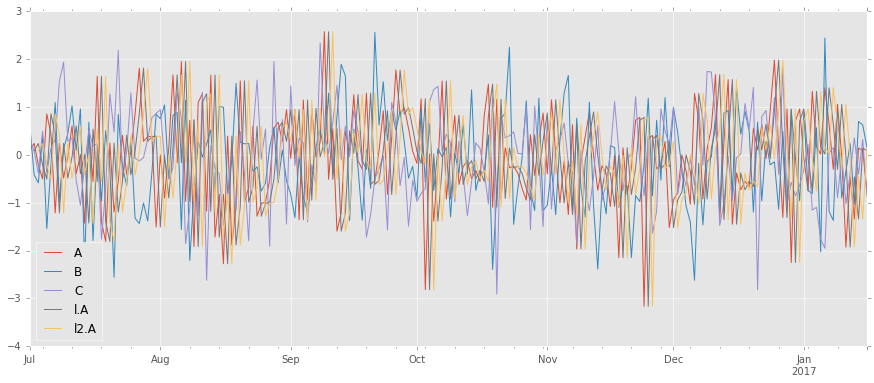

In [11]:
df.plot()

### Rolling windows functions

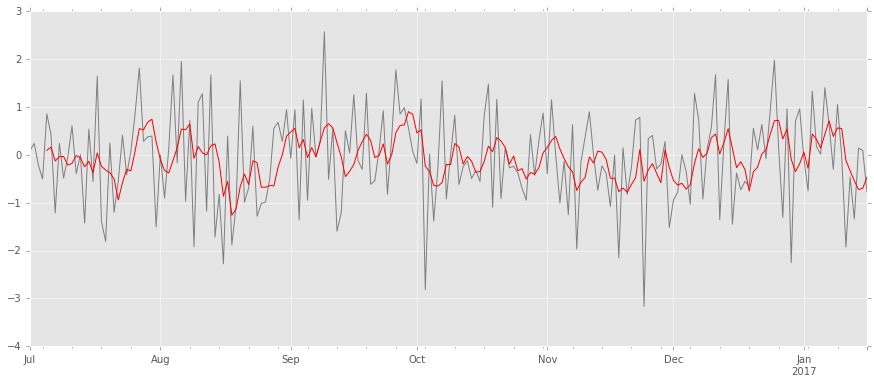

In [22]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 5)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.A.plot(color ='gray')
r.mean()['A'].plot(color = 'red')

In [23]:
## get the rolling sum and mean using agg functions
r.A.agg(['sum','mean']).head(10)

,sum,mean
2016-07-01,NaN,NaN
2016-07-02,NaN,NaN
2016-07-03,NaN,NaN
2016-07-04,NaN,NaN
2016-07-05,0.466826,0.093365
2016-07-06,0.814025,0.162805
2016-07-07,-0.638659,-0.127732
2016-07-08,-0.186312,-0.037262
2016-07-09,-0.166375,-0.033275
2016-07-10,-1.066955,-0.213391


### Custom rolling window function

In [27]:
## rolling window, calculate mean absolute error 
## remember the thet x we are getting in lambda function is an array with size = to window size
df.rolling(window = 5).apply(lambda x:np.fabs(x - x.mean()).mean()).head(10)     # np.fabs = absolute value

,A,B,C,l.A,l2.A
2016-07-01,NaN,NaN,NaN,NaN,NaN
2016-07-02,NaN,NaN,NaN,NaN,NaN
2016-07-03,NaN,NaN,NaN,NaN,NaN
2016-07-04,NaN,NaN,NaN,NaN,NaN
2016-07-05,0.363767,0.640521,0.320268,NaN,NaN
2016-07-06,0.416284,0.473582,0.289994,0.363767,NaN
2016-07-07,0.617958,0.729936,0.328104,0.416284,0.363767
2016-07-08,0.657524,0.811046,0.471836,0.617958,0.416284
2016-07-09,0.652740,0.768102,0.818775,0.657524,0.617958
2016-07-10,0.508647,0.550673,0.715745,0.652740,0.657524


### Expanding windows

In [28]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,l.A,l2.A
2016-07-02,0.162735,0.080754,0.202278,0.085777,NaN
2016-07-03,0.038572,-0.141102,0.008508,0.162735,0.085777
2016-07-04,-0.097407,-0.007633,0.129798,0.038572,0.162735
2016-07-05,0.093365,-0.314260,0.032518,-0.097407,0.038572
